# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.nlp import *

# Loading the Data

In [2]:
df_bg_tmp = pd.read_csv('../datasets/games-cleaned.csv')
df_bg = df_bg_tmp.copy()

# Topic Modeling

In [3]:
bg_nlp = df_bg[['name', 'description']].copy()
bg_nlp = setup(bg_nlp, target = 'description', custom_stopwords = ['player', 'card', 'play', 'game'], session_id=42)

Description,Value
session_id,42
Documents,4582
Vocab Size,17117
Custom Stopwords,True


In [4]:
lda = create_model('lda', num_topics = 6, multi_core = True)
lda_results = assign_model(lda)
lda_results.head()

,name,description,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Dominant_Topic,Perc_Dominant_Topic
0,Pandemic,pandemic several virulent disease break simult...,0.246394,0.551103,0.001415,0.198259,0.001415,0.001414,Topic 1,0.55
1,Carcassonne,draw place tile piece southern french landscap...,0.002475,0.002465,0.945597,0.044526,0.002469,0.002467,Topic 2,0.95
2,Catan,formerly try dominant settlement city road tur...,0.206817,0.000804,0.628321,0.000804,0.000802,0.162450,Topic 2,0.63
3,7 Wonders,leader great city ancient world gather resourc...,0.499834,0.136541,0.358718,0.001635,0.001632,0.001640,Topic 0,0.50
4,Dominion,parent ruler small pleasant kingdom river ever...,0.389834,0.603608,0.001641,0.001642,0.001633,0.001642,Topic 1,0.60


In [5]:
lda_results['Dominant_Topic'].value_counts()

Topic 2    1258
Topic 0    1174
Topic 4     836
Topic 3     710
Topic 1     385
Topic 5     219
Name: Dominant_Topic, dtype: int64

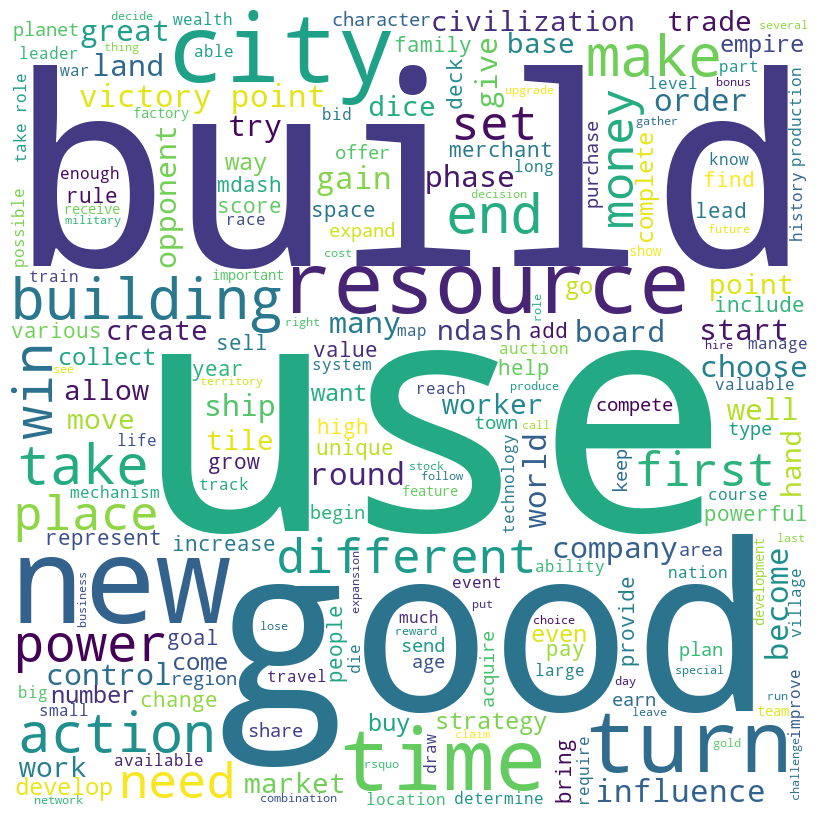

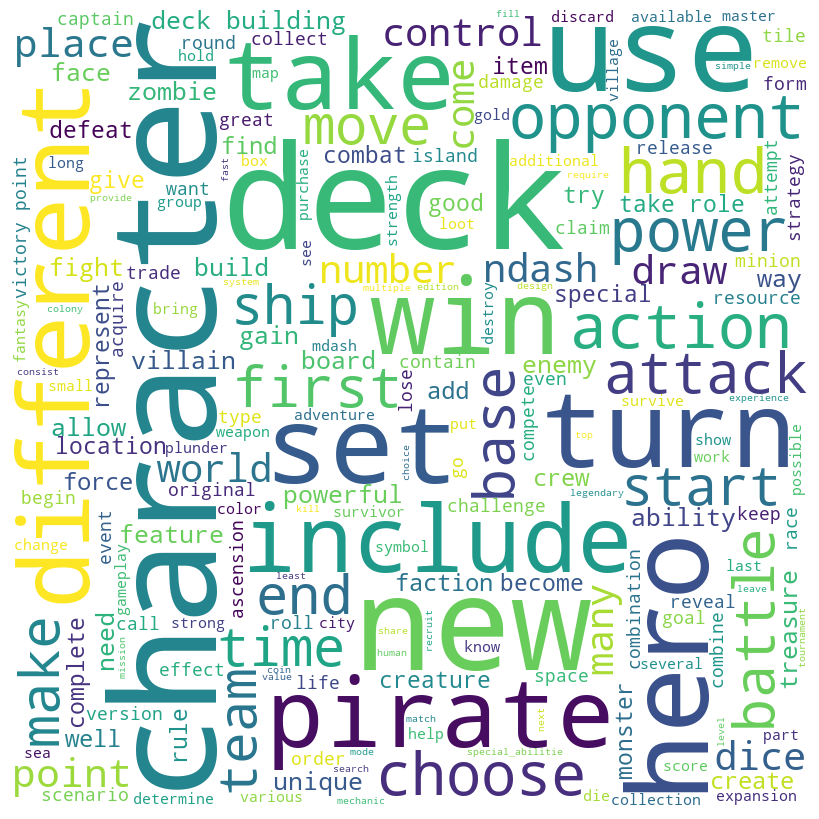

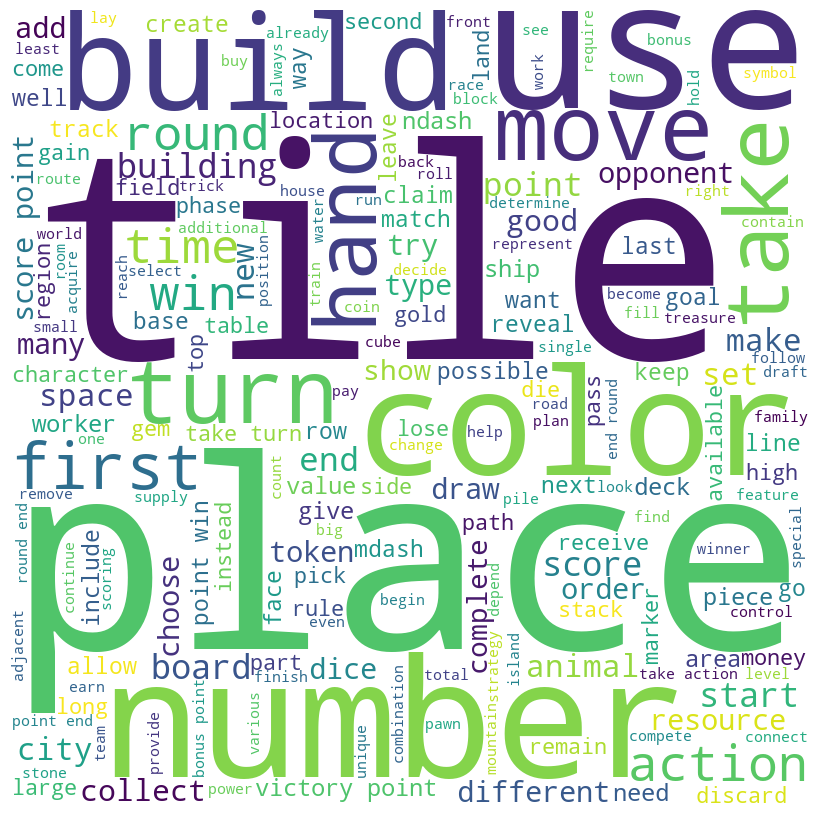

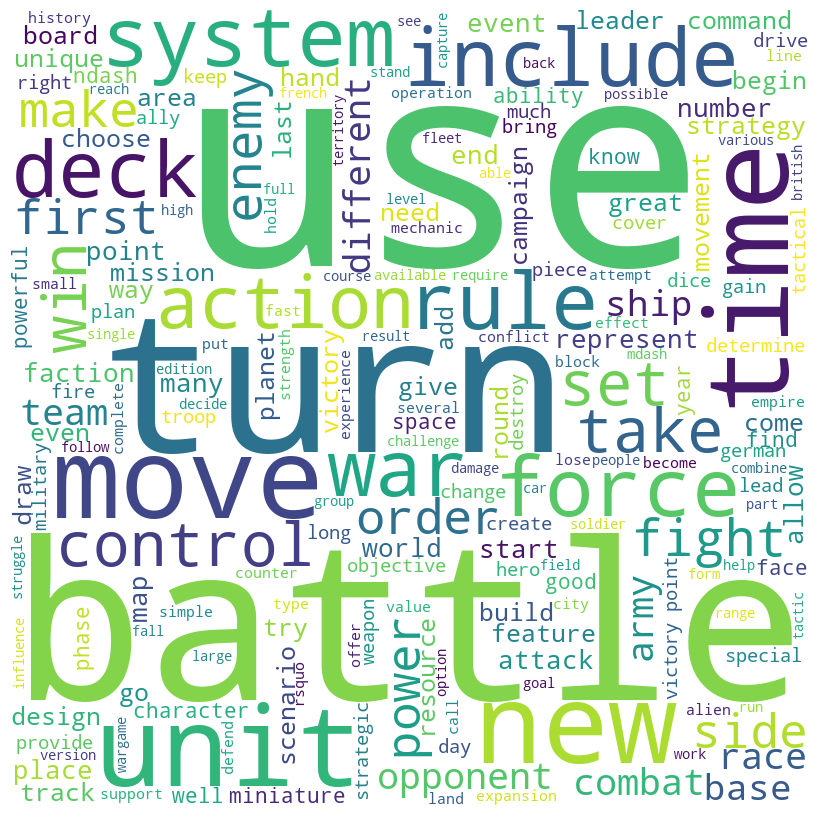

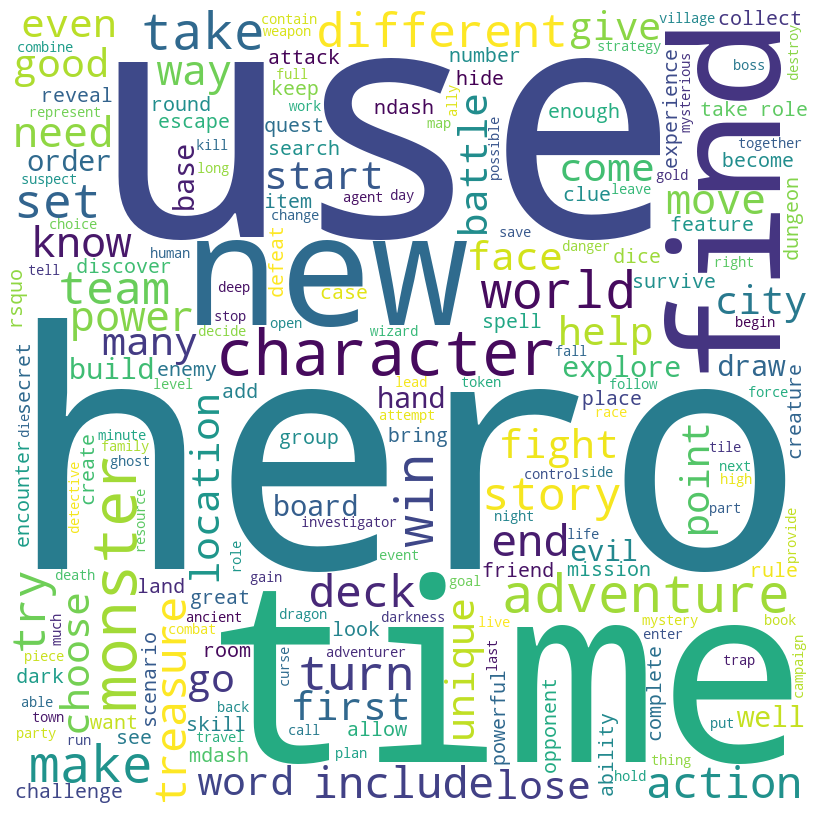

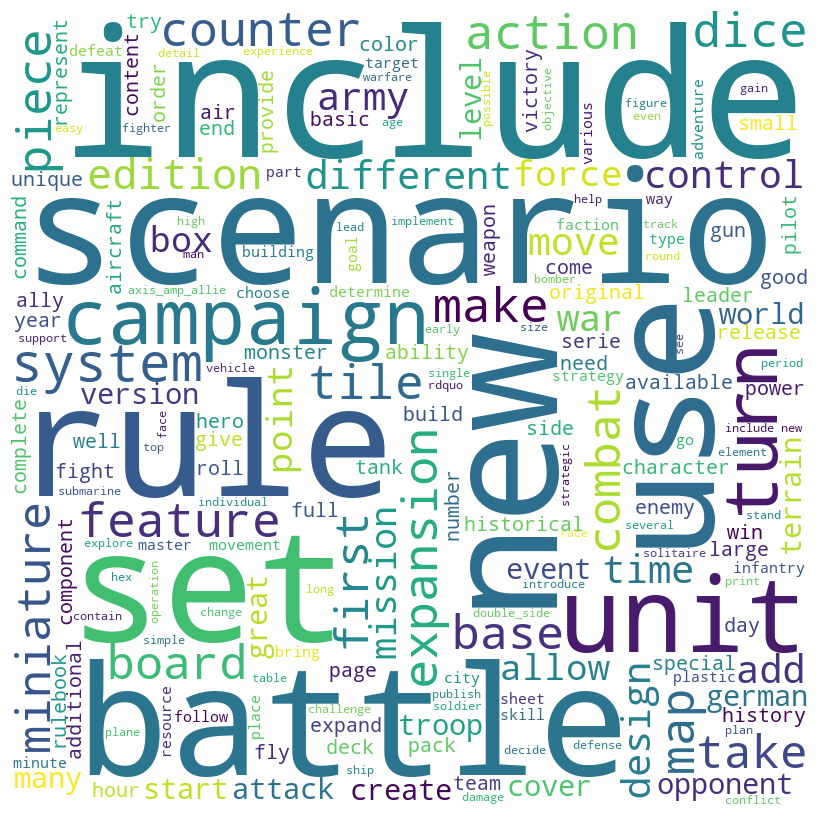

In [6]:
for i in range(6):
    plot_model(lda, plot = 'wordcloud', topic_num=f'Topic {i}')

In [7]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…